In [170]:
import pandas as pd
import numpy as np
from clabsi_utils import *
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import numpy as np

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [171]:
data = pd.read_csv('/Users/imrozeshaheen/Downloads/2016-10-04/data1_ssi_clabsi_101.csv')

# test_data = graphlab.SFrame.read_csv(
#     'data3_all_11_14_updated.csv', column_type_hints=column_type_hints
# )

In [172]:

data.columns

Index([u'sex', u'race', u'age', u'Unnamed: 3', u'Unnamed: 4', u'Unnamed: 5',
       u'Unnamed: 6', u'Unnamed: 7', u'Unnamed: 8', u'Unnamed: 9',
       ...
       u'ssi_acen_res', u'ssi_acen_sen', u'ssi_pseud_res', u'ssi_pseud_sen',
       u'ssi_strep_res', u'ssi_strep_sen', u'losdays', u'race_desp', u'race_n',
       u'clabsi'],
      dtype='object', length=309)

Hypothesis: As the number of days in days in the ICU increases, the number of days with a central line in place increases.

const      18.838192
icudays     0.490255
dtype: float64


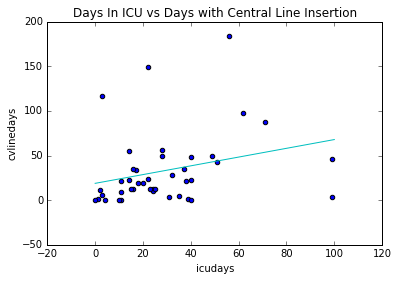

In [173]:
data.plot.scatter('icudays', 'cvlinedays')
data=data[['icudays','cvlinedays']].dropna()
X = data.icudays
Y = data.cvlinedays
results = sm.OLS(Y,sm.add_constant(X)).fit()
X_plot = np.linspace(0, 100, 200)
plt.title('Days In ICU vs Days with Central Line Insertion')

plt.plot(X_plot, X_plot*results.params[1] + results.params[0], color='c')
print results.params


<td></p>Figure 1. Days In ICU vs Days with Central Line Insertion</p></td>


Patients in the ICU are more likely to have a central line inserted due to their critical condition.

const    10.762411
age       0.305581
dtype: float64


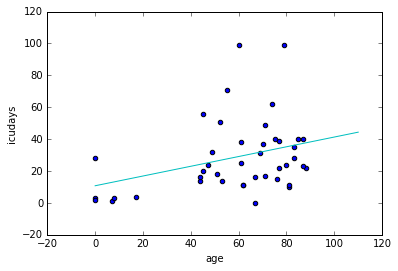

In [175]:
data = pd.read_csv('/Users/imrozeshaheen/Downloads/2016-10-04/data1_ssi_clabsi_101.csv')
data.plot.scatter('age', 'icudays')
data=data[['age','icudays']].dropna()
X = data.age
Y = data.icudays
results = sm.OLS(Y,sm.add_constant(X)).fit()
X_plot = np.linspace(0, 110, 110) 
plt.xlim = (0,110)


plt.xlabel('age')
plt.plot(X_plot, X_plot*results.params[1] + results.params[0], color='c')
print results.params




<td></p>Figure 1. Age vs Days in ICU</p></td>

As the age of a patient increases, the ability to recover decreases. Patients with a decreased ability to recover are likely to remain in a critical condition for longer, thereby increasing the number of days spent in the Intensive Care Unit.